In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows',500) 


In [3]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [4]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439


In [5]:
time_idx=pd_raw.columns[4:]

In [6]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()


,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [7]:
pd_raw['Country/Region'].head()

0    Afghanistan
1        Albania
2        Algeria
3        Andorra
4         Angola
Name: Country/Region, dtype: object

In [8]:
x=pd_raw[pd_raw['Country/Region']=='Germany']

In [9]:
x.iloc[:,4:]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
130,0,0,0,0,0,1,4,4,4,5,...,251058,251728,253626,254957,256433,258149,259735,260817,261737,263222


In [12]:
# pd_raw[pd_raw['Country/Region']=='Nepal'].iloc[:,4::].sum(axis=0)[0:4]
pd_raw[pd_raw['Country/Region']=='India'].iloc[:,4::].sum(axis=0).tail()


9/10/20    4562414
9/11/20    4659984
9/12/20    4754356
9/13/20    4846427
9/14/20    4846427
dtype: int64

In [13]:
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Nepal',
              'India'
             ]

In [14]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4:].sum(axis=0))

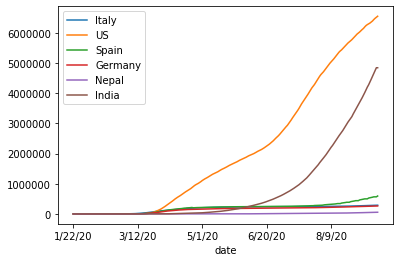

In [15]:
%matplotlib inline
df_plot.set_index('date').plot()

In [16]:
df_plot.tail()

,date,Italy,US,Spain,Germany,Nepal,India
232,9/10/20,283180,6396100,554143,258149,50465,4562414
233,9/11/20,284796,6443652,566326,259735,51919,4659984
234,9/12/20,286297,6485123,566326,260817,53120,4754356
235,9/13/20,287753,6519573,566326,261737,54159,4846427
236,9/14/20,288761,6553652,593730,263222,55329,4846427


In [17]:
from datetime import datetime

In [18]:
df_plot.date[0]

'1/22/20'

In [19]:
datetime.strptime(df_plot.date[0],"%m/%d/%y")

datetime.datetime(2020, 1, 22, 0, 0)

In [20]:
time_idx=[datetime.strptime(each,"%m/%d/%y") for each in df_plot.date]

In [21]:
time_str=[each.strftime("%Y-%m-%d") for each in time_idx]

In [22]:
df_plot["date"]=time_idx

In [23]:
type(df_plot["date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [24]:
df_plot.head()

,date,Italy,US,Spain,Germany,Nepal,India
0,2020-01-22,0,1,0,0,0,0
1,2020-01-23,0,1,0,0,0,0
2,2020-01-24,0,2,0,0,0,0
3,2020-01-25,0,2,0,0,1,0
4,2020-01-26,0,5,0,0,1,0


In [25]:
df_plot.to_csv("../data/processed/COVID_small_flat_table.csv", sep=";")

Relational data model

In [26]:
# data_path="../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"

In [27]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439


In [28]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country', 'Province/State':'state'})
pd_data_base.head()

,state,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439


In [29]:
pd_data_base['state']=pd_data_base['state'].fillna('no') 

In [30]:
pd_data_base=pd_data_base.drop(["Lat","Long"],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772
1,no,Albania,0,0,0,0,0,0,0,0,...,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520
2,no,Algeria,0,0,0,0,0,0,0,0,...,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496
3,no,Andorra,0,0,0,0,0,0,0,0,...,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438
4,no,Angola,0,0,0,0,0,0,0,0,...,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439


In [31]:
pd_data_base.set_index(['state','country']).head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
state country                                                             
no    Afghanistan        0        0        0        0        0        0   
      Albania            0        0        0        0        0        0   
      Algeria            0        0        0        0        0        0   
      Andorra            0        0        0        0        0        0   
      Angola             0        0        0        0        0        0   

                   1/28/20  1/29/20  1/30/20  1/31/20  ...  9/5/20  9/6/20  \
state country                                          ...                   
no    Afghanistan        0        0        0        0  ...   38324   38398   
      Albania            0        0        0        0  ...   10102   10255   
      Algeria            0        0        0        0  ...   46071   46364   
      Andorra            0        0        0        0  ...    1215    1215   
      Angola             0        0        0        0  ...    2935    2965   

                   9/7/20  9/8/20  9/9/20  9/10/20  9/11/20  9/12/20  9/13/20  \
state country                                                                   
no    Afghanistan   38494   38520   38544    38572    38606    38641    38716   
      Albania       10406   10553   10704    10860    11021    11185    11353   
      Algeria       46653   46938   47216    47488    47752    48007    48254   
      Andorra        1261    1261    1301     1301     1344     1344     1344   
      Angola         2981    3033    3092     3217     3279     3335     3388   

                   9/14/20  
state country               
no    Afghanistan    38772  
      Albania        11520  
      Algeria        48496  
      Andorra         1438  
      Angola          3439  

[5 rows x 237 columns]

In [32]:
pd_data_base.set_index(['state','country']).T.head()

state            no                                                     \
country Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda   
1/22/20           0       0       0       0      0                   0   
1/23/20           0       0       0       0      0                   0   
1/24/20           0       0       0       0      0                   0   
1/25/20           0       0       0       0      0                   0   
1/26/20           0       0       0       0      0                   0   

state                     Australian Capital Territory New South Wales  ...  \
country Argentina Armenia                    Australia       Australia  ...   
1/22/20         0       0                            0               0  ...   
1/23/20         0       0                            0               0  ...   
1/24/20         0       0                            0               0  ...   
1/25/20         0       0                            0               0  ...   
1/26/20         0       0                            0               3  ...   

state               no                                       \
country United Kingdom Uruguay Uzbekistan Venezuela Vietnam   
1/22/20              0       0          0         0       0   
1/23/20              0       0          0         0       2   
1/24/20              0       0          0         0       2   
1/25/20              0       0          0         0       2   
1/26/20              0       0          0         0       2   

state                                                            
country West Bank and Gaza Western Sahara Yemen Zambia Zimbabwe  
1/22/20                  0              0     0      0        0  
1/23/20                  0              0     0      0        0  
1/24/20                  0              0     0      0        0  
1/25/20                  0              0     0      0        0  
1/26/20                  0              0     0      0        0  

[5 rows x 266 columns]

In [33]:
pd_data_base.set_index(['state','country']).T.stack(level=[0,1]).head()

         state                         country       
1/22/20  Alberta                       Canada            0.0
         Anguilla                      United Kingdom    0.0
         Anhui                         China             1.0
         Aruba                         Netherlands       0.0
         Australian Capital Territory  Australia         0.0
dtype: float64

In [34]:
pd_data_base.set_index(['state','country']).T.stack(level=[0,1]).reset_index().head()

,level_0,state,country,0
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [35]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [36]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

In [37]:
print(pd_relational_model[pd_relational_model['country']=='US'].tail())

          date state country  confirmed
61964  9/10/20    no      US    6396100
62230  9/11/20    no      US    6443652
62496  9/12/20    no      US    6485123
62762  9/13/20    no      US    6519573
63028  9/14/20    no      US    6553652
